### Also known as amplitude amplification algorithm

In [1]:
import numpy as np

from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *

In [11]:
def phase_oracle(n, indices_to_mark, name='Oracle'):
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        # flip the amplitudes for all the marked states
        oracle_matrix[index_to_mark, index_to_mark] = -1
    # convert the matrix to an operator
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

def diffuser(n):
    qc = QuantumCircuit(n, name='Diff - "V"')
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    return qc

def get_dept(n, marked):
    return np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)

def Grover(n, marked):
    qc = QuantumCircuit(n, n)
    p = int(get_dept(n, marked))
    print(f"{n} qubits, basis state {marked} marked, {p} rounds")
    qc.h(range(n))
    for _ in range(p):
        qc.append(phase_oracle(n,marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n), range(n))
    return qc

5 qubits, basis state [13] marked, 4 rounds


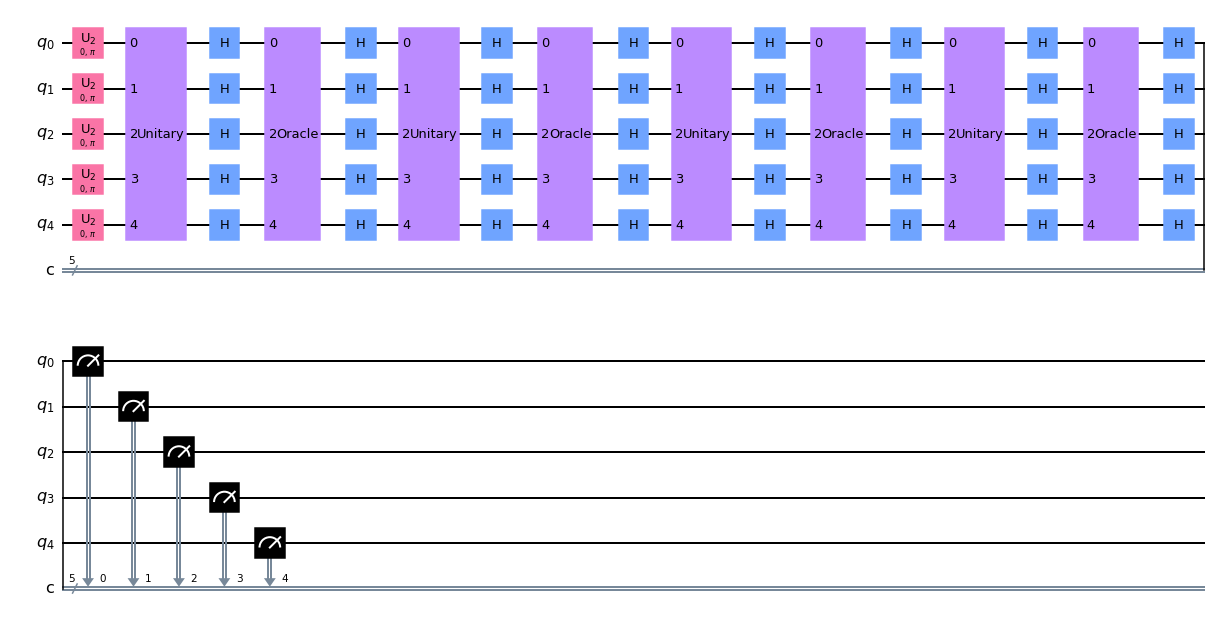

In [12]:
n = 5
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n, marked)
qc.decompose().draw('mpl')

{'01111': 1, '01001': 1, '01110': 1, '10001': 1, '00100': 1, '01101': 9990, '11101': 1, '11110': 2, '00010': 1, '10110': 1}
4.0


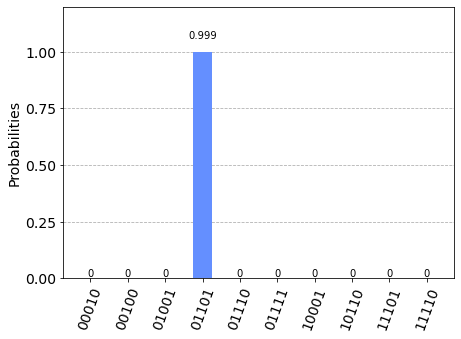

In [13]:
backend = Aer.get_backend('qasm_simulator')
shots = 10000
result = execute(qc, backend=backend, shots = shots).result()
counts = result.get_counts(qc)
dept = get_dept(n, marked)
print(counts)
print(dept)
plot_histogram(counts)

#### Use IBM-Q

In [ ]:
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y == x:
    y = np.random.randint(2**n)
marked = [x,y]
qc = Grover(n, marked)
backend = least_busy(provider.backends(filter=lambda x: x.configuration().n_qubits == 5 and
                                      not x.configuration().simulator and x.status().operational == True))

print(f"least busy backend: {backend}")
backend = provider.get_backend('ibmq_vigo')
%qiskit_job_watcher

shots = 1024
job = exeucte(qc, backend=backend, shots=shots, optimization_level=3)

In [ ]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)